In [ ]:

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Bhavik-punmiya/dog-vs-cat-classifier/blob/main/notebook/dog_vs_cat_classifier.ipynb)


In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [5]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:20<00:00, 93.8MB/s]
100% 1.06G/1.06G [00:20<00:00, 56.3MB/s]


In [6]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [15]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout


In [8]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256, 256)
)

Found 20000 files belonging to 2 classes.


In [9]:
validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256, 256)
)

Found 5000 files belonging to 2 classes.


In [10]:
# Normalize the images

def process(image, label):
  image = tf.cast(image/255, tf.float32),
  return image, label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [11]:
# create CNN Model

model = Sequential()

model.add(Conv2D(32, kernel_size = (3,3), padding = 'valid', activation = 'relu', input_shape = (256, 256, 3)))
model.add(MaxPooling2D(pool_size=(2,2), strides = 2, padding = 'valid'))

model.add(Conv2D(64, kernel_size = (3,3), padding = 'valid', activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides = 2, padding = 'valid'))

model.add(Conv2D(128, kernel_size = (3,3), padding = 'valid', activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides = 2, padding = 'valid'))

model.add(Flatten())

model.add(Dense(128, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 128)       0

In [13]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics ='accuracy')


In [14]:
history = model.fit(train_ds, epochs = 10, validation_data = validation_ds )

Epoch 1/10
625/625 [==============================] - 73s 104ms/step - loss: 0.6266 - accuracy: 0.6471 - val_loss: 0.5889 - val_accuracy: 0.6970
Epoch 2/10
625/625 [==============================] - 59s 93ms/step - loss: 0.4919 - accuracy: 0.7574 - val_loss: 0.4688 - val_accuracy: 0.7798
Epoch 3/10
625/625 [==============================] - 51s 81ms/step - loss: 0.3989 - accuracy: 0.8137 - val_loss: 0.4338 - val_accuracy: 0.8046
Epoch 4/10
625/625 [==============================] - 81s 128ms/step - loss: 0.3008 - accuracy: 0.8651 - val_loss: 0.5679 - val_accuracy: 0.8044
Epoch 5/10
625/625 [==============================] - 54s 84ms/step - loss: 0.1878 - accuracy: 0.9225 - val_loss: 0.7649 - val_accuracy: 0.7876
Epoch 6/10
625/625 [==============================] - 52s 83ms/step - loss: 0.1120 - accuracy: 0.9570 - val_loss: 1.1276 - val_accuracy: 0.7816
Epoch 7/10
625/625 [==============================] - 67s 107ms/step - loss: 0.0716 - accuracy: 0.9739 - val_loss: 1.0678 - val_accura

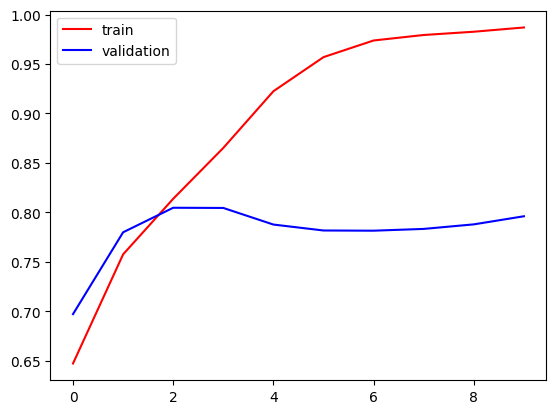

In [16]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color = 'red', label = 'train')
plt.plot(history.history['val_accuracy'], color = 'blue', label = 'validation')
plt.legend()
plt.show()

In [ ]:
# Applying Batch Normalization and Dropout to reduce overfitting

model = Sequential()

model.add(Conv2D(32, kernel_size = (3,3), padding = 'valid', activation = 'relu', input_shape = (256, 256, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides = 2, padding = 'valid'))

model.add(Conv2D(64, kernel_size = (3,3), padding = 'valid', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides = 2, padding = 'valid'))

model.add(Conv2D(128, kernel_size = (3,3), padding = 'valid', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides = 2, padding = 'valid'))

model.add(Flatten())

model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation = 'sigmoid'))

In [27]:
import cv2
test_img_dog = cv2.imread('/content/dog.webp')
test_img_cat = cv2.imread('/content/cat.jpg')

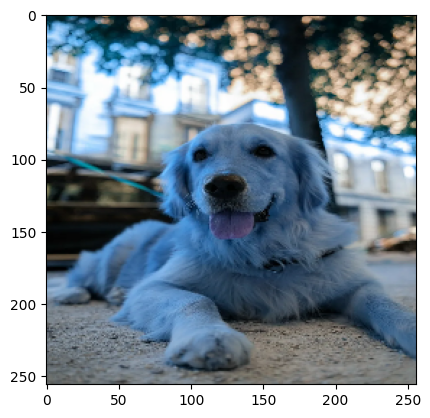

In [26]:
plt.imshow(test_img_dog)

In [21]:
test_img_dog.shape

(1216, 860, 3)

In [28]:
test_img_dog = cv2.resize(test_img_dog,(256, 256))
test_img_cat = cv2.resize(test_img_cat, ( 256, 256))

array([[[  0,  52,  66],
        [  1,  53,  67],
        [  1,  54,  68],
        ...,
        [ 51,  62,  42],
        [ 79,  76,  58],
        [ 94,  80,  59]],

       [[  3,  53,  67],
        [  3,  53,  67],
        [  2,  52,  66],
        ...,
        [ 32,  45,  29],
        [ 48,  49,  31],
        [ 87,  76,  55]],

       [[  4,  50,  66],
        [  1,  48,  64],
        [  0,  47,  62],
        ...,
        [ 19,  34,  24],
        [ 53,  58,  40],
        [ 92,  83,  64]],

       ...,

       [[ 92,  96,  94],
        [ 99, 102, 100],
        [105, 108, 106],
        ...,
        [123, 126, 123],
        [125, 128, 125],
        [125, 127, 125]],

       [[ 98, 101, 100],
        [ 97, 100,  99],
        [ 97, 100,  99],
        ...,
        [124, 127, 124],
        [125, 128, 125],
        [127, 130, 128]],

       [[106, 108, 110],
        [106, 108, 110],
        [105, 108, 107],
        ...,
        [128, 129, 126],
        [125, 128, 125],
        [124, 127, 124]]], dtype=uint8)
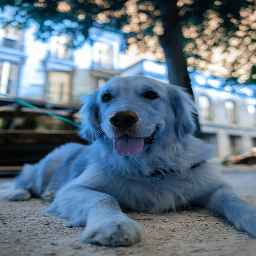

In [29]:
test_img_dog

array([[[ 66,  78,  85],
        [ 76,  86,  93],
        [ 79,  87,  94],
        ...,
        [ 62,  83,  82],
        [ 73,  91,  99],
        [ 91, 108, 117]],

       [[ 71,  83,  89],
        [ 78,  88,  95],
        [ 82,  90,  97],
        ...,
        [ 62,  81,  81],
        [ 71,  89,  96],
        [ 88, 106, 113]],

       [[ 74,  86,  92],
        [ 77,  87,  94],
        [ 82,  90,  97],
        ...,
        [ 63,  79,  79],
        [ 70,  87,  94],
        [ 85, 102, 110]],

       ...,

       [[ 96, 101,  85],
        [ 58,  63,  56],
        [ 19,  26,  26],
        ...,
        [ 24,  29,  39],
        [ 36,  44,  57],
        [ 44,  51,  66]],

       [[ 96, 100,  85],
        [ 60,  64,  57],
        [ 21,  28,  28],
        ...,
        [ 31,  36,  49],
        [ 34,  43,  56],
        [ 34,  44,  58]],

       [[ 95,  98,  83],
        [ 63,  67,  60],
        [ 32,  40,  39],
        ...,
        [ 34,  39,  53],
        [ 31,  42,  54],
        [ 27,  39,  51]]], dtype=uint8)
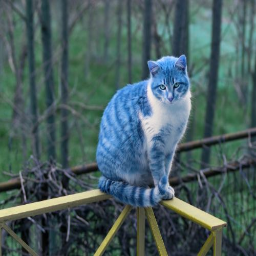

In [30]:
test_img_cat

In [35]:
test_input_dog = test_img_dog.reshape((1,256,256,3))
test_input_cat = test_img_cat.reshape((1,256,256,3))

In [36]:
model.predict(test_input_dog)

1/1 [==============================] - 0s 48ms/step


array([[0.]], dtype=float32)

In [42]:
prediction = model.predict(test_input_cat)
if prediction[0] == 0:
  print('The given image is Dog')
elif prediction == 1:
  print('The given output image is Cat')

1/1 [==============================] - 0s 39ms/step
The given output image is Cat
